In [33]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [34]:
(X_train, y_train), (X_test, y_test)=keras.datasets.mnist.load_data()

In [35]:
len(X_train)

60000

In [36]:
len(X_test)

10000

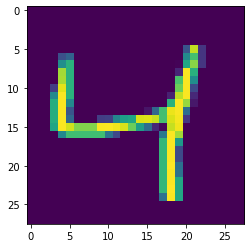

In [37]:
plt.imshow(X_train[2])

In [38]:
X_train=X_train/255
X_test=X_test/255

In [39]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [40]:
X_train_flattened.shape

(60000, 784)

In [41]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 842us/step - loss: 0.4669 - accuracy: 0.8776
Epoch 2/10
1875/1875 [==============================] - 2s 838us/step - loss: 0.3038 - accuracy: 0.9148
Epoch 3/10
1875/1875 [==============================] - 2s 850us/step - loss: 0.2834 - accuracy: 0.9203
Epoch 4/10
1875/1875 [==============================] - 2s 832us/step - loss: 0.2728 - accuracy: 0.9234
Epoch 5/10
1875/1875 [==============================] - 2s 838us/step - loss: 0.2664 - accuracy: 0.9257
Epoch 6/10
1875/1875 [==============================] - 2s 845us/step - loss: 0.2622 - accuracy: 0.9273
Epoch 7/10
1875/1875 [==============================] - 2s 832us/step - loss: 0.2584 - accuracy: 0.9283
Epoch 8/10
1875/1875 [==============================] - 2s 839us/step - loss: 0.2555 - accuracy: 0.9289
Epoch 9/10
1875/1875 [==============================] - 2s 847us/step - loss: 0.2531 - accuracy: 0.9303
Epoch 10/10
1875/1875 [==============================] - 2s 874u

In [43]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2611 - accuracy: 0.9278


[0.2610945403575897, 0.9277999997138977]

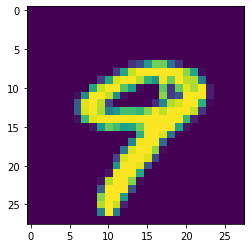

In [44]:
plt.imshow(X_test[9])

In [47]:
y_pred=model.predict(X_test_flattened)

In [50]:
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[9]

9

In [48]:
y_pred[9]

array([3.15321813e-05, 1.62124369e-09, 1.88418812e-06, 2.63541937e-04,
       9.08612847e-01, 9.90509987e-04, 1.05095175e-07, 9.17119622e-01,
       3.39780450e-01, 9.96356606e-01], dtype=float32)

In [49]:
np.argmax(y_pred[9])

9

In [52]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    1,    5,    7,    2,    1,    1],
       [   0, 1113,    4,    2,    0,    1,    3,    2,   10,    0],
       [   3,    8,  929,   16,    8,    4,   10,   10,   41,    3],
       [   2,    0,   18,  928,    1,   20,    2,    9,   24,    6],
       [   1,    1,    5,    2,  923,    0,    9,    4,    9,   28],
       [   7,    2,    1,   38,    9,  772,   14,    8,   35,    6],
       [  10,    3,    9,    1,    7,   13,  912,    1,    2,    0],
       [   1,    6,   20,    8,   10,    0,    0,  952,    2,   29],
       [   5,    9,    6,   20,    9,   19,    8,   10,  881,    7],
       [   9,    7,    1,    9,   32,    6,    0,   26,   11,  908]])>

Text(69.0, 0.5, 'actual')

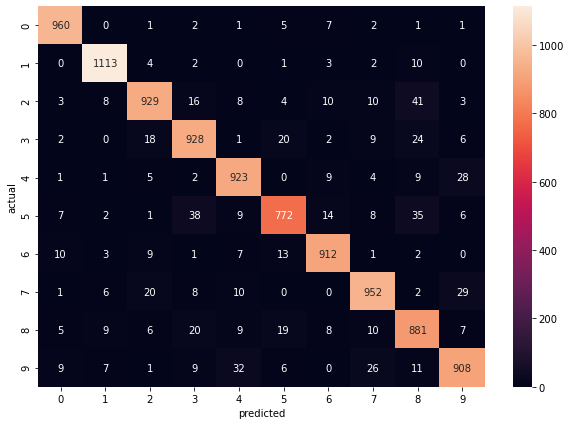

In [54]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("predicted")
plt.ylabel("actual")

In [55]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2769 - accuracy: 0.9197
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1303 - accuracy: 0.9622
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0902 - accuracy: 0.9734: 0s - loss: 0.0
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0683 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0541 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0441 - accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0345 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0292 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0229 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/st

In [56]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 950us/step - loss: 0.0880 - accuracy: 0.9745


[0.08795201033353806, 0.9745000004768372]

In [58]:
y_pred=model.predict(X_test_flattened)
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[9]

9

In [59]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    0,    0,    1,    1,    2,    2,    2,    2],
       [   2, 1121,    3,    0,    0,    1,    2,    0,    6,    0],
       [   8,    1,  990,    6,    4,    0,    3,    8,   12,    0],
       [   1,    0,    2,  990,    0,    1,    0,    4,   10,    2],
       [   1,    1,    1,    0,  968,    0,    3,    0,    2,    6],
       [   2,    1,    0,   13,    3,  857,    7,    1,    7,    1],
       [   8,    2,    0,    0,    4,    5,  933,    0,    6,    0],
       [   2,    6,    9,    2,    3,    0,    0,  987,    6,   13],
       [   8,    1,    2,    2,    2,    3,    0,    2,  950,    4],
       [   2,    2,    0,    2,   11,    5,    0,    3,    5,  979]])>

Text(69.0, 0.5, 'actual')

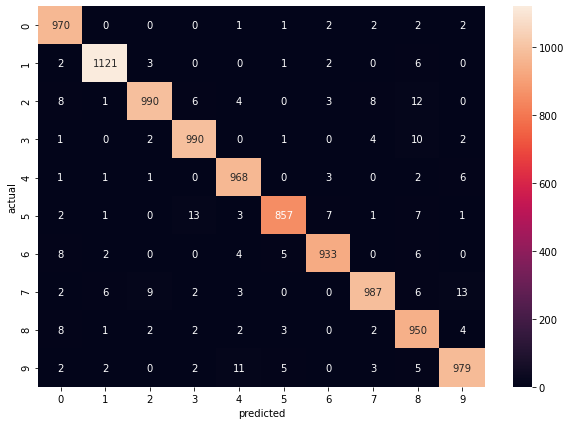

In [60]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("predicted")
plt.ylabel("actual")